In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


dataset=pd.read_excel(r'/content/drive/MyDrive/ML_Python/data.xlsx')




# summarize first few lines

scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)

dataset = df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset

array([[9.61784116e-01, 6.87034998e-01, 6.64634054e-01, ...,
        9.07472155e-01, 2.82458253e-01, 7.56331640e-15],
       [9.61784116e-01, 6.86289760e-01, 6.64634054e-01, ...,
        9.07472155e-01, 2.82458253e-01, 7.56331640e-15],
       [9.80892046e-01, 7.04172859e-01, 5.82753220e-01, ...,
        9.07472155e-01, 2.81467126e-01, 7.55713161e-15],
       ...,
       [5.09546859e-02, 2.33979657e-01, 4.12022153e-01, ...,
        7.04625885e-01, 1.03072125e-01, 8.02075673e-15],
       [4.45855835e-02, 2.33234410e-01, 4.11150559e-01, ...,
        7.11743647e-01, 1.02081452e-01, 8.02075673e-15],
       [2.54776541e-02, 2.14605598e-01, 1.98605457e-01, ...,
        7.11743647e-01, 1.03072125e-01, 8.02075673e-15]])

In [ ]:
type(dataset)

numpy.ndarray

### **FIRST TRIAL**

2000 epochs 15 neurons 1 layer

In [ ]:

# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=False)


model.summary()
# evaluate on test set




I was going to use accuracy plot to interpret but it didn't work, I don't know why. So I used mse to interpret throughout the whole report.



Loss function is smaller when there are 5000 epochs but val_loss is minimum when there are 2000 epochs this shows us there is overfitting when epoch number is greater than 2000. Therefore, even though I know that it didnt converge yet I'll use 2000 epochs.

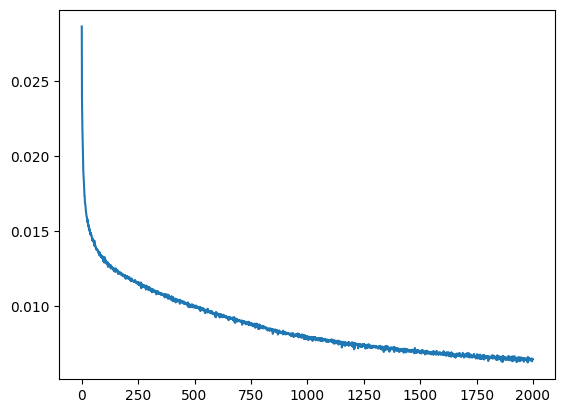

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

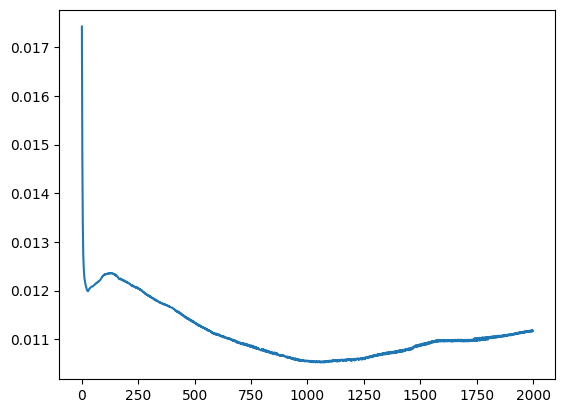

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

It can be seen that test mse is larger than train mse , which is expected
when there are 2000 epochs. It was opposite when there were 200 epochs. For logical interpretations, loss function should converge first.

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

4/4 [==============================] - 0s 3ms/step
MSE: 0.012
4/4 [==============================] - 0s 2ms/step
Test R2 square: 0.22151071241646803
Test MAE:  0.08184969
Test MSE:  0.012033254
9/9 [==============================] - 0s 2ms/step
Train R2 square: 0.42198470414831446
Train MAE:  0.074367456
Train MSE:  0.009398476


### **SECOND TRIAL**

Changed the number of neurons to 100 from 15 and loss function decreased. At first, I tried it with 2000 epochs but loss function didn't converge so I tried with 3000 epochs and saw that it has converged.


In [ ]:
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()

Loss function converged, train mse decreased compared to 2000 epoch 15 neuron in the hidden layer.

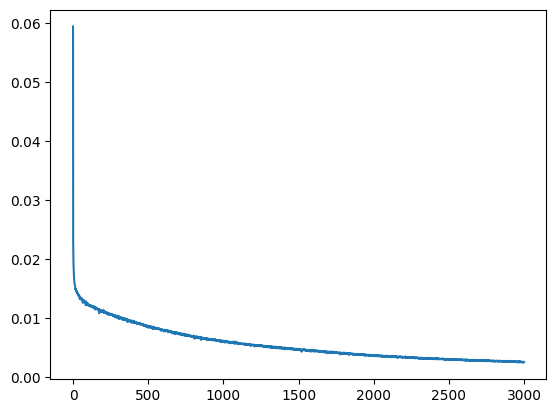

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

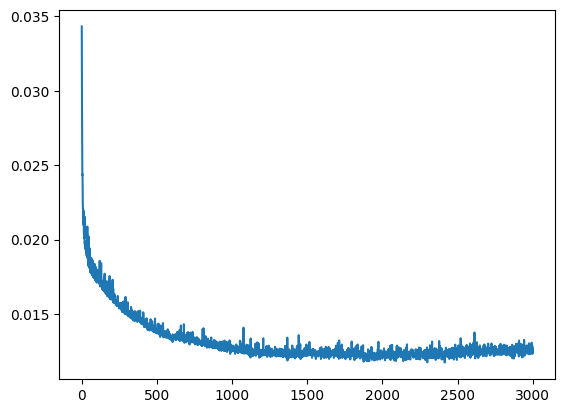

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

4/4 [==============================] - 0s 3ms/step
MSE: 0.016
4/4 [==============================] - 0s 3ms/step
Test R2 square: -0.006439992610620671
Test MAE:  0.089997835
Test MSE:  0.015556731
9/9 [==============================] - 0s 2ms/step
Train R2 square: 0.6628803214664528
Train MAE:  0.050776992
Train MSE:  0.005481535


I saw that code is working better with 3000 epoch and 100 neurons compared to 2000 epochs and 15 neurons. I think that second trial is a good fit since both loss function and val_loss function converge at same point. Now I'll add another layer to code to see whether it is better or not.

### **THIRD TRIAL**

I've added one more layer to 2000 epoch and 100 neurons for the third trial, and saw that loss function didn't converge so I've tried with 3000 epochs.

In [ ]:
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='relu'))
model.add(Dense(12))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()

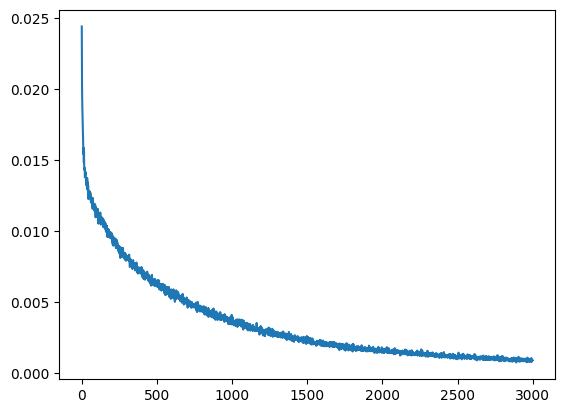

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

k fold cross validation dene

Is this overfit? I think it is since loss function nearly converged at 3000 epochs but val_loss acts weirdly.

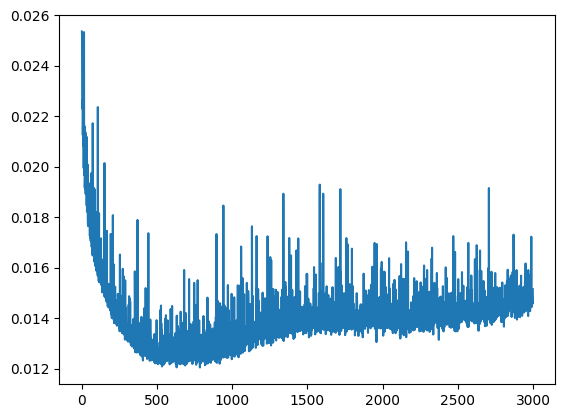

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

Loss function is really really small and train mse didn't change that much. Test mse increased I think there might be an overfit.

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

4/4 [==============================] - 0s 4ms/step
MSE: 0.020
4/4 [==============================] - 0s 3ms/step
Test R2 square: -0.2658536791564232
Test MAE:  0.09949591
Test MSE:  0.019566536
9/9 [==============================] - 0s 2ms/step
Train R2 square: 0.6612251715646659
Train MAE:  0.04983527
Train MSE:  0.0055084466


### **FOURTH TRIAL**

Now I'll try to decrease train size.

In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)

dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.5, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()
# evaluate on test set

I was expecting these error results. Since I've decreased the train_size and increased the test_size, train mse have increased, and test mse have decreased.

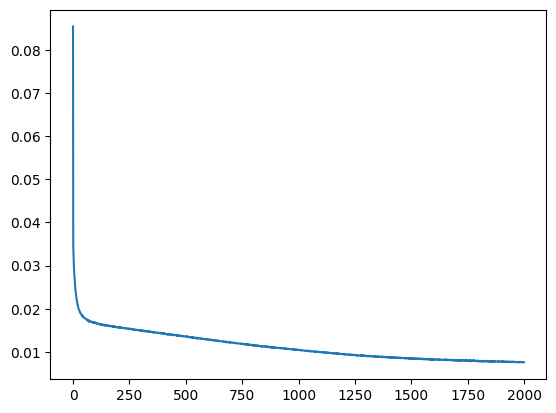

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

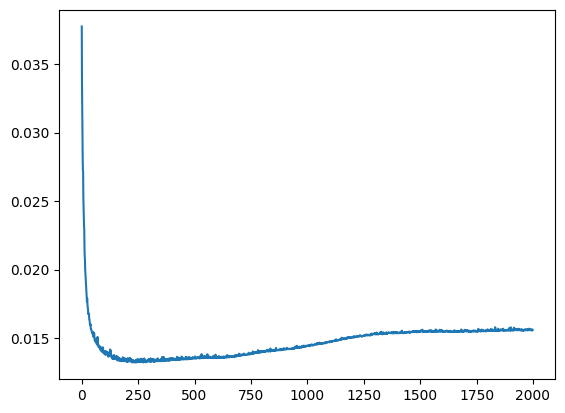

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

7/7 [==============================] - 0s 2ms/step
MSE: 0.016
7/7 [==============================] - 0s 2ms/step
Test R2 square: -0.06022871202175706
Test MAE:  0.093080975
Test MSE:  0.016319154
7/7 [==============================] - 0s 2ms/step
Train R2 square: 0.4008195370151282
Train MAE:  0.0766537
Train MSE:  0.009924152


### **FIFTH TRIAL**

I'll decrease the epoch number with the decreased train_size.

In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)

dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.5, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()
# evaluate on test set

(199, 11)
(199, 1)
Epoch 1/1000
35/35 - 1s - loss: 0.2326 - accuracy: 0.0072 - val_loss: 0.0526 - val_accuracy: 0.0000e+00 - 1s/epoch - 38ms/step
Epoch 2/1000
35/35 - 0s - loss: 0.0295 - accuracy: 0.0072 - val_loss: 0.0179 - val_accuracy: 0.0000e+00 - 102ms/epoch - 3ms/step
Epoch 3/1000
35/35 - 0s - loss: 0.0197 - accuracy: 0.0072 - val_loss: 0.0145 - val_accuracy: 0.0000e+00 - 93ms/epoch - 3ms/step
Epoch 4/1000
35/35 - 0s - loss: 0.0190 - accuracy: 0.0072 - val_loss: 0.0142 - val_accuracy: 0.0000e+00 - 90ms/epoch - 3ms/step
Epoch 5/1000
35/35 - 0s - loss: 0.0187 - accuracy: 0.0072 - val_loss: 0.0139 - val_accuracy: 0.0000e+00 - 102ms/epoch - 3ms/step
Epoch 6/1000
35/35 - 0s - loss: 0.0185 - accuracy: 0.0072 - val_loss: 0.0141 - val_accuracy: 0.0000e+00 - 87ms/epoch - 2ms/step
Epoch 7/1000
35/35 - 0s - loss: 0.0184 - accuracy: 0.0072 - val_loss: 0.0141 - val_accuracy: 0.0000e+00 - 88ms/epoch - 3ms/step
Epoch 8/1000
35/35 - 0s - loss: 0.0182 - accuracy: 0.0072 - val_loss: 0.0138 - val_a

Both train and test mse decreased. Therefore, I can say that 1000 epoch is more suitable than 2000 for decreased train size.

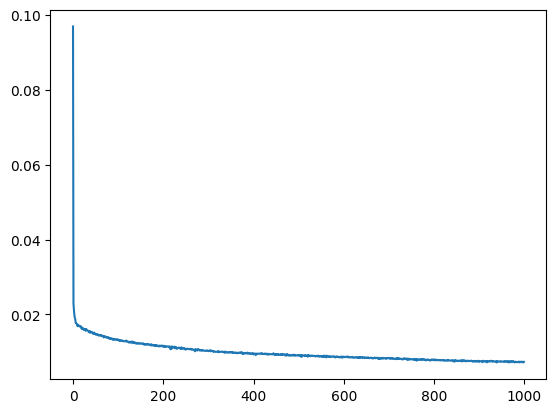

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

But in this case val_loss didnt converge. So, can I say that the decreasing of mse's are just noises?

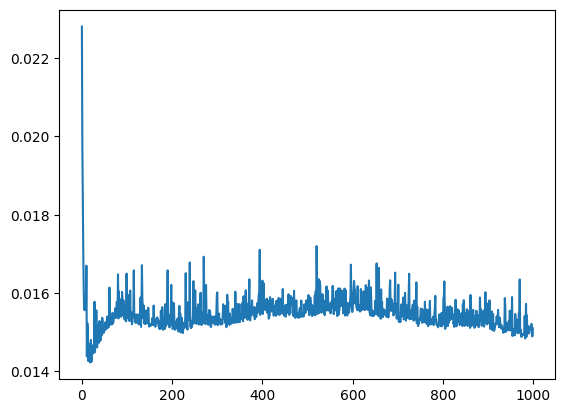

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

7/7 [==============================] - 0s 3ms/step
MSE: 0.015
7/7 [==============================] - 0s 3ms/step
Test R2 square: 0.04222425563416665
Test MAE:  0.09192947
Test MSE:  0.014742186
7/7 [==============================] - 0s 2ms/step
Train R2 square: 0.4274738324043582
Train MAE:  0.07523576
Train MSE:  0.00948268


All these changes decreased the train size but how do I decrease the test size?

### **SIXTH TRIAL**

Now, I'll try to form an overfit

In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)

dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10000, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()
# evaluate on test set

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

4/4 [==============================] - 0s 3ms/step
MSE: 0.015
4/4 [==============================] - 0s 3ms/step
Test R2 square: 0.03959111125940906
Test MAE:  0.09014688
Test MSE:  0.014845219
9/9 [==============================] - 0s 3ms/step
Train R2 square: 0.08615630372464245
Train MAE:  0.09135675
Train MSE:  0.014859015


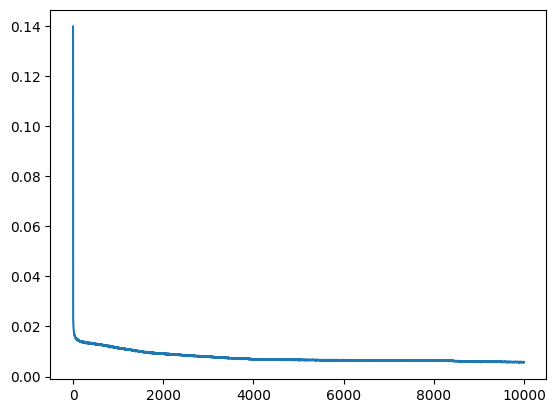

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

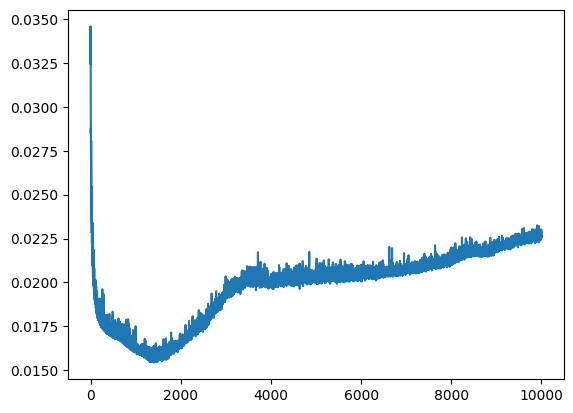

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

In [ ]:
scaler = MinMaxScaler()

df = scaler.fit_transform(dataset)

dataset = df
# split into input (X) and output (Y) variables
# split into input and output columns
x1, y1 = df[:, 1:12], df[:, 13:14]

x=np.asarray(x1).astype(np.float32)
y=np.asarray(y1).astype(np.float32)
# Splitting the data for training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

print(x_train.shape)
print(y_train.shape)


#print(x_train)
#print(y_train)

# define the keras model
model = Sequential()
model.add(Dense(15, input_shape=(11,), activation='relu'))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='sgd')




# fit the keras model on the training set
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, batch_size=4, verbose=2, validation_split = 0.3, shuffle=True)


model.summary()
# evaluate on test set

(279, 11)
(279, 1)
Epoch 1/500
49/49 - 1s - loss: 0.0728 - accuracy: 0.0000e+00 - val_loss: 0.0630 - val_accuracy: 0.0119 - 905ms/epoch - 18ms/step
Epoch 2/500
49/49 - 0s - loss: 0.0468 - accuracy: 0.0000e+00 - val_loss: 0.0537 - val_accuracy: 0.0119 - 151ms/epoch - 3ms/step
Epoch 3/500
49/49 - 0s - loss: 0.0399 - accuracy: 0.0000e+00 - val_loss: 0.0478 - val_accuracy: 0.0119 - 110ms/epoch - 2ms/step
Epoch 4/500
49/49 - 0s - loss: 0.0352 - accuracy: 0.0000e+00 - val_loss: 0.0423 - val_accuracy: 0.0119 - 146ms/epoch - 3ms/step
Epoch 5/500
49/49 - 0s - loss: 0.0320 - accuracy: 0.0000e+00 - val_loss: 0.0383 - val_accuracy: 0.0119 - 144ms/epoch - 3ms/step
Epoch 6/500
49/49 - 0s - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0354 - val_accuracy: 0.0119 - 110ms/epoch - 2ms/step
Epoch 7/500
49/49 - 0s - loss: 0.0269 - accuracy: 0.0000e+00 - val_loss: 0.0330 - val_accuracy: 0.0119 - 106ms/epoch - 2ms/step
Epoch 8/500
49/49 - 0s - loss: 0.0252 - accuracy: 0.0000e+00 - val_loss: 0.0308 - va

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

4/4 [==============================] - 0s 3ms/step
MSE: 0.013
4/4 [==============================] - 0s 3ms/step
Test R2 square: 0.18255734869334306
Test MAE:  0.08676505
Test MSE:  0.012635363
9/9 [==============================] - 0s 2ms/step
Train R2 square: 0.14329841301525958
Train MAE:  0.087056465
Train MSE:  0.013929889


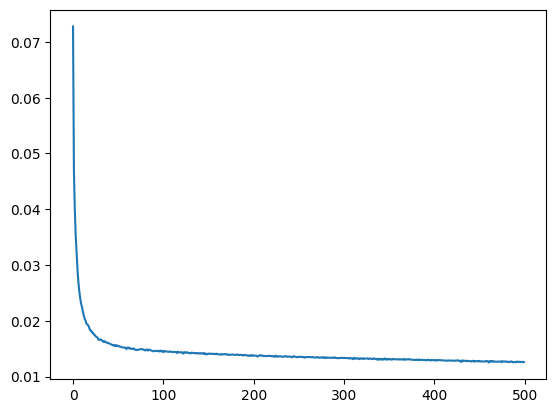

In [ ]:
matplotlib.pyplot.plot(history.history['loss'])

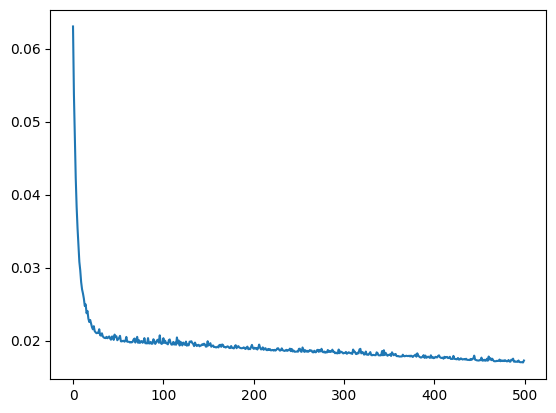

In [ ]:
matplotlib.pyplot.plot(history.history['val_loss'])

There is so small difference in the both train and test mse between seventh trial and sixth trial. I think this is interesting. Couldn't find a good reasoning to this.